**QL Book ch01**

In [1]:
#!pip install QuantLib      # QuantLibのインストール

In [2]:
import datetime ; import numpy as np ; import matplotlib.pyplot as plt
# matplotlibグラフの表示設定(日本語フォントとサイズ、グラフサイズ)
plt.rcParams.update({"font.family":"MS Gothic","font.size":12,
                                          "figure.figsize":[6,4]})
import QuantLib as ql
calJP = ql.Japan()     # カレンダーオブジェクトの作成

In [3]:
help(calJP)

Help on Japan in module QuantLib.QuantLib object:

class Japan(Calendar)
 |  Proxy of C++ QuantLib::Japan class.
 |  
 |  Method resolution order:
 |      Japan
 |      Calendar
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      __init__(Japan self) -> Japan
 |  
 |  __repr__ = _swig_repr(self)
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __swig_destroy__ = delete_Japan(...)
 |      delete_Japan(Japan self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  thisown
 |      The membership flag
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from Calendar:
 |  
 |  __eq__(self, other)
 |      __eq__(Calendar self, Calendar other) -> bool
 |  
 |  __hash__(self)
 |      Return hash(self).
 |  
 |  __ne__(self, other)
 |      __ne__(Calendar self, Calend

In [4]:
calJP.isHoliday(ql.Date('2022-08-11', '%Y-%m-%d'))

True

In [5]:
calJP.advance(ql.Date('2022-08-10', '%Y-%m-%d'), ql.Period('2d'))

Date(15,8,2022)

In [6]:
calJP.advance(ql.Date('2022-08-10', '%Y-%m-%d'), 2, ql.Days)

Date(15,8,2022)

In [7]:
(calJP.advance(ql.Date('2022-08-10', '%Y-%m-%d'), 2, ql.Days)).ISO()

'2022-08-15'

In [8]:
dt1 = datetime.date.fromisoformat('2022-08-11')
ql.Date().from_date(dt1)

Date(11,8,2022)

In [9]:
dt2 = ql.Date('2022-08-11', '%Y-%m-%d')
dt2.to_date()

datetime.date(2022, 8, 11)

In [10]:
help(ql.Date())

Help on Date in module QuantLib.QuantLib object:

class Date(builtins.object)
 |  Date(*args)
 |  
 |  Proxy of C++ Date class.
 |  
 |  Methods defined here:
 |  
 |  ISO(self)
 |      ISO(Date self) -> std::string
 |  
 |  __add__ = Date_new___add__(self, x)
 |  
 |  __bool__(self)
 |      __bool__(Date self) -> bool
 |  
 |  __cmp__(self, other)
 |      __cmp__(Date self, Date other) -> int
 |  
 |  __eq__(self, other)
 |      __eq__(Date self, Date other) -> bool
 |  
 |  __ge__(self, other)
 |      __ge__(Date self, Date other) -> bool
 |  
 |  __gt__(self, other)
 |      __gt__(Date self, Date other) -> bool
 |  
 |  __hash__(self)
 |      __hash__(Date self) -> int
 |  
 |  __init__(self, *args)
 |      __init__(Date self) -> Date
 |      __init__(Date self, Day d, Month m, Year y) -> Date
 |      __init__(Date self, Day d, Month m, Year y, Hour hours, Minute minutes, Second seconds, Millisecond millisec=0, Microsecond microsec=0) -> Date
 |      __init__(Date self, BigInteger s

In [11]:
ql.Date().todaysDate()

Date(19,1,2024)

In [12]:
dates = [ql.Date('2022-08-03', '%Y-%m-%d'),ql.Date('2022-11-04', '%Y-%m-%d'), 
         ql.Date('2023-02-03', '%Y-%m-%d'),ql.Date('2023-08-03', '%Y-%m-%d')]
zeros = [0.0, 0.01, 0.02, 0.03]
dcA365   = ql.Actual365Fixed()
curveOBJ = ql.ZeroCurve(dates, zeros, dcA365, calJP)
           # 残り3つの引数の初期値は ql.Linear(), ql.Continuous, ql.Annual
curveOBJ.nodes()

((Date(3,8,2022), 0.0),
 (Date(4,11,2022), 0.01),
 (Date(3,2,2023), 0.02),
 (Date(3,8,2023), 0.03))

In [13]:
#help(curveOBJ)
curveOBJ.discount(ql.Date('2023-03-01', '%Y-%m-%d')) 

0.9877424354295338

In [14]:
print('dayCounter   ', curveOBJ.dayCounter())
print('referenceDate', curveOBJ.referenceDate())
print('times    {:.6f}, {:.6f}, {:.6f}, {:.6f}'.format(*curveOBJ.times()) )
print('discount {:.6f}, {:.6f}, {:.6f}, {:.6f}'
                         .format(*[curveOBJ.discount(dt) for dt in dates]))

dayCounter    Actual/365 (Fixed) day counter
referenceDate August 3rd, 2022
times    0.000000, 0.254795, 0.504110, 1.000000
discount 1.000000, 0.997455, 0.989968, 0.970446


In [15]:
rate0503 = curveOBJ.zeroRate(ql.Date('2023-05-03', '%Y-%m-%d'),
                                          dcA365, ql.Continuous)
print(rate0503)     #print(rate0503.rate())

2.491713 % Actual/365 (Fixed) continuous compounding


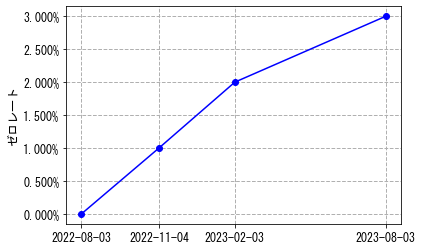

In [16]:
cDates, cRates = list(zip(*[(dt.to_date(), rt) for dt,rt in curveOBJ.nodes()]))
plt.plot(cDates, cRates, color="b", marker='o')
plt.xticks(cDates); plt.ylabel('ゼロレート')
plt.grid(linestyle='--',linewidth=1)                            
# y軸の%表示
import matplotlib as mpl     
plt.gca().yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1,3))

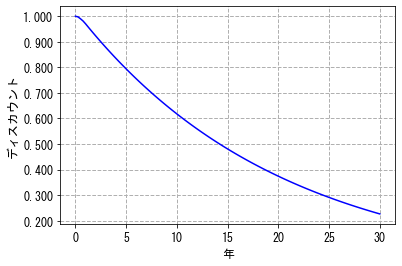

In [17]:
curveOBJ.enableExtrapolation()
timeTICK = np.linspace(0.0, 30.0, 121)
discFCTR = [curveOBJ.discount(t) for t in timeTICK]
plt.plot(timeTICK, discFCTR, color="b");plt.ylabel('ディスカウント');plt.xlabel('年')
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))  # y軸の桁数
plt.grid(linestyle='--',linewidth=1)                                 # グリッド表示

In [18]:
cmpdSPL, freqA = ql.Simple, ql.Annual
curveOBJ = ql.ZeroCurve(dates, zeros, dcA365, calJP, ql.Linear(), cmpdSPL, freqA)
curveOBJ.discount(ql.Date('2022-11-04', '%Y-%m-%d')) 

0.9974585303200065

In [19]:
tradeDT = ql.Date('2022-08-01','%Y-%m-%d')
ql.Settings.instance().evaluationDate = tradeDT
calJP, Tp2 = ql.Japan(), 2                         # Tp2 := T+2
settleDT = calJP.advance(tradeDT, Tp2, ql.Days)

tbr3m  = ql.Tibor(ql.Period('3M'))
tbr6m  = ql.Tibor(ql.Period('6M'))
tbr12m = ql.Tibor(ql.Period('12M'))

rate3m  = ql.SimpleQuote(0.01)
rate6m  = ql.SimpleQuote(0.02)
rate12m = ql.SimpleQuote(0.03)

helper3m  = ql.DepositRateHelper(ql.QuoteHandle(rate3m),   tbr3m)
helper6m  = ql.DepositRateHelper(ql.QuoteHandle(rate6m),   tbr6m) 
helper12m = ql.DepositRateHelper(ql.QuoteHandle(rate12m),  tbr12m)
helpers   = [helper3m, helper6m, helper12m ]

curveOBJ = ql.PiecewiseLogLinearDiscount(settleDT, helpers, dcA365)
curveOBJ.nodes()

((Date(3,8,2022), 1.0),
 (Date(4,11,2022), 0.9974585303200327),
 (Date(3,2,2023), 0.9900184441792355),
 (Date(3,8,2023), 0.9708737864077671))

In [20]:
rate3m.setValue(0.02)
curveOBJ.nodes()

((Date(3,8,2022), 1.0),
 (Date(4,11,2022), 0.9949299460284549),
 (Date(3,2,2023), 0.9900184441792355),
 (Date(3,8,2023), 0.9708737864077671))

In [21]:
print('todayDate:      ', ql.Date().todaysDate())
print('evaluationDate: ', ql.Settings.instance().evaluationDate)

todayDate:       January 19th, 2024
evaluationDate:  August 1st, 2022


In [22]:
helper3m.quote().value()

0.02

In [23]:
tradeDT = ql.Date('2022-08-01', '%Y-%m-%d')
settleDT = tbr3m.valueDate(tradeDT)         #2022-08-03
print('trade          : ', tradeDT)
print('settle         : ', settleDT)
print('--------------- ---------------------')
print('fixingDays     : ', tbr3m.fixingDays())
print('fixingDate     : ', tbr3m.fixingDate(settleDT), '\n')

print('tenor          : ', tbr3m.tenor())
print('dayCounter     : ', tbr3m.dayCounter())
print('fixingCalendar : ', tbr3m.fixingCalendar())
print('maturityDate   : ', tbr3m.maturityDate(settleDT))

trade          :  August 1st, 2022
settle         :  August 3rd, 2022
--------------- ---------------------
fixingDays     :  2
fixingDate     :  August 1st, 2022 

tenor          :  3M
dayCounter     :  Actual/365 (Fixed) day counter
fixingCalendar :  Japan calendar
maturityDate   :  November 4th, 2022


In [24]:
rate3m.setValue(0.01)
curveOBJ.discount(ql.Date('2023-03-01', '%Y-%m-%d')) 

0.98724533619916

In [25]:
import myUtil as mu ; from myABBR import *

# InterestRate class  (初期値 1.0%)
iRate = 0.01                   
iRateOBJ = ql.InterestRate(iRate, dcA365, cmpdCMP, freqSA)
print('Object:', iRateOBJ)
print('rate method:{: .6%}'.format(iRateOBJ.rate()) )

Object: 1.000000 % Actual/365 (Fixed) Semiannual compounding
rate method: 1.000000%


In [26]:
# FlatForward class
ffCrvOBJ = ql.FlatForward(settleDT, iRate, dcA365, cmpdSPL, freqSA)
ffCrvHDL = ql.YieldTermStructureHandle(ffCrvOBJ)
ffCrvOBJ.discount(mu.jDT(2022,11,4))            # 3ヶ月のDF

0.9974585303200065

In [27]:
import QuantLib as ql ; import xlwings as xw
import myUtil as mu   ; from myABBR import *
@xw.func

def tiborDF(r3m, r6m, r12m, tgtDT):
    
    mu.setEvDT(mu.jDT(2022,8,1))
    tbr3m  = ql.Tibor(pdFreqQ )
    tbr6m  = ql.Tibor(pdFreqSA)
    tbr12m = ql.Tibor(pdFreqA )

    rate3mHDL  = mu.sqHDL( r3m)
    rate6mHDL  = mu.sqHDL( r6m)
    rate12mHDL = mu.sqHDL(r12m)        

    helper3m  = ql.DepositRateHelper(rate3mHDL,  tbr3m)
    helper6m  = ql.DepositRateHelper(rate6mHDL,  tbr6m) 
    helper12m = ql.DepositRateHelper(rate12mHDL,tbr12m)
    helpers   = [helper3m, helper6m, helper12m ]

    curveOBJ = ql.PiecewiseLogLinearDiscount(Tp2, calJP, helpers, dcA365)
    curveOBJ.enableExtrapolation()
    return curveOBJ.discount(mu.iDT(tgtDT)) 

In [28]:
tiborDF(0.01, 0.02, 0.03, '2022-11-04')

0.9974585303200327

In [29]:
!pip show xlwings
#!pip install xlwings

Name: xlwings
Version: 0.24.9
Summary: Make Excel fly: Interact with Excel from Python and vice versa.
Home-page: https://www.xlwings.org
Author: Zoomer Analytics LLC
Author-email: felix.zumstein@zoomeranalytics.com
License: BSD 3-clause
Location: c:\users\user\anaconda3\lib\site-packages
Requires: pywin32
Required-by: 


In [30]:
import QuantLib as ql ; import xlwings as xw
import myUtil as mu   ; from myABBR import *
@xw.func
@xw.arg('data', ndim=1)
def tiborDF2(data):
    r3m, r6m, r12m, tgtDT = data
    mu.setEvDT(mu.jDT(2022,8,1))
    tbr3m  = ql.Tibor(pdFreqQ )
    tbr6m  = ql.Tibor(pdFreqSA)
    tbr12m = ql.Tibor(pdFreqA )

    rate3mHDL  = mu.sqHDL( r3m)
    rate6mHDL  = mu.sqHDL( r6m)
    rate12mHDL = mu.sqHDL(r12m)        

    helper3m  = ql.DepositRateHelper(rate3mHDL,  tbr3m)
    helper6m  = ql.DepositRateHelper(rate6mHDL,  tbr6m) 
    helper12m = ql.DepositRateHelper(rate12mHDL,tbr12m)
    helpers   = [helper3m, helper6m, helper12m ]

    curveOBJ = ql.PiecewiseLogLinearDiscount(Tp2, calJP, helpers, dcA365)
    curveOBJ.enableExtrapolation()
    return curveOBJ.discount(mu.iDT(tgtDT)) 

In [31]:
x = [0.01, 0.02, 0.03, '2022-11-04']
tiborDF2(x)

0.9974585303200327